Analysis of Nigeria Malaria was done using the Indicator Survey (NMIS) dataset to perform some descriptive analysis using python programming. Id are individuals who had malaria

In [3]:
#import of libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# LOAD THE DATASET

In [39]:
data=pd.read_csv("Nigeria-Malaria-Survey.csv") 

In [5]:
data.head()

,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto


In [6]:
data.shape

(7745, 18)

In [7]:
data.isnull().values.any() 

True

# Renaming the columns for better understanding

In [43]:
data.columns=["ID","region","geographical location","source of water","toilet facility","availability of electricity","floor type","wall material","roofing material","owns a bicycle","has a motorcycle/scooter","has a car/truck","has a mosquito net","owns land for farming","has a bank account","wealth index","cost of treatment","state"]

In [44]:
data.head()

,ID,region,geographical location,source of water,toilet facility,availability of electricity,floor type,wall material,roofing material,owns a bicycle,has a motorcycle/scooter,has a car/truck,has a mosquito net,owns land for farming,has a bank account,wealth index,cost of treatment,state
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto


In [45]:
data.columns=[str.replace('/','or') for str in data.columns] #replaces / in column name with or
data.tail()

,ID,region,geographical location,source of water,toilet facility,availability of electricity,floor type,wall material,roofing material,owns a bicycle,has a motorcycleorscooter,has a carortruck,has a mosquito net,owns land for farming,has a bank account,wealth index,cost of treatment,state
7740,333108,south west,rural,tube well or borehole,flush to septic tank,yes,cement,cement,roofing shingles,no,no,no,yes,no,yes,richest,NaN,ogun
7741,333113,south west,rural,sachet water,flush to septic tank,yes,cement,cement,roofing shingles,no,no,no,yes,no,yes,richest,NaN,ogun
7742,333119,south west,rural,sachet water,flush to piped sewer system,yes,ceramic tiles,cement,roofing shingles,no,no,no,no,no,yes,richest,NaN,ogun
7743,333124,south west,rural,tube well or borehole,flush to piped sewer system,yes,cement,cement,roofing shingles,no,yes,no,yes,yes,yes,richest,NaN,ogun
7744,333129,south west,rural,sachet water,flush to piped sewer system,yes,carpet,cement,roofing shingles,no,no,yes,yes,no,yes,richest,NaN,ogun


In [46]:
data.info()  #summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7745 entries, 0 to 7744
Data columns (total 18 columns):
ID                             7745 non-null int64
region                         7745 non-null object
geographical location          7745 non-null object
source of water                7745 non-null object
toilet facility                7744 non-null object
availability of electricity    7745 non-null object
floor type                     7745 non-null object
wall material                  7745 non-null object
roofing material               7745 non-null object
owns a bicycle                 7745 non-null object
has a motorcycleorscooter      7745 non-null object
has a carortruck               7745 non-null object
has a mosquito net             7745 non-null object
owns land for farming          7745 non-null object
has a bank account             7745 non-null object
wealth index                   7745 non-null object
cost of treatment              3 non-null float64
state       

In [47]:
data.dtypes

ID                               int64
region                          object
geographical location           object
source of water                 object
toilet facility                 object
availability of electricity     object
floor type                      object
wall material                   object
roofing material                object
owns a bicycle                  object
has a motorcycleorscooter       object
has a carortruck                object
has a mosquito net              object
owns land for farming           object
has a bank account              object
wealth index                    object
cost of treatment              float64
state                           object
dtype: object

# Dealing with the null values

In [48]:
data.drop('cost of treatment', axis=1, inplace=True)  #only 3 non nul values so I drop it

In [49]:
data.drop('ID', axis=1, inplace=True) #not useful in what I am doing

In [50]:
data. sample()

,region,geographical location,source of water,toilet facility,availability of electricity,floor type,wall material,roofing material,owns a bicycle,has a motorcycleorscooter,has a carortruck,has a mosquito net,owns land for farming,has a bank account,wealth index,state
6184,south south,rural,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,no,yes,yes,no,richer,akwa ibom


In [51]:
data.isnull().sum()

region                         0
geographical location          0
source of water                0
toilet facility                1
availability of electricity    0
floor type                     0
wall material                  0
roofing material               0
owns a bicycle                 0
has a motorcycleorscooter      0
has a carortruck               0
has a mosquito net             0
owns land for farming          0
has a bank account             0
wealth index                   0
state                          0
dtype: int64

In [52]:
n = 5
data['toilet facility'].value_counts()[:n].index.tolist() #list out the most occurences of toilet facility

['no facility/bush/field',
 'pit latrine with slab',
 'pit latrine without slab/open pit',
 'flush to piped sewer system',
 'flush to septic tank']

In [53]:
data['toilet facility'].fillna('no facility/bush/field', inplace=True) #replace with the most occurence

In [19]:
data.isnull().sum() #displays sum of null values if any

region                         0
geographical location          0
source of water                0
toilet facility                0
availability of electricity    0
floor type                     0
wall material                  0
roofing material               0
owns a bicycle                 0
has a motorcycleorscooter      0
has a carortruck               0
has a mosquito net             0
owns land for farming          0
has a bank account             0
wealth index                   0
state                          0
dtype: int64

In [20]:
df = pd.DataFrame(data) 
df


,region,geographical location,source of water,toilet facility,availability of electricity,floor type,wall material,roofing material,owns a bicycle,has a motorcycleorscooter,has a carortruck,has a mosquito net,owns land for farming,has a bank account,wealth index,state
0,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,sokoto
1,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,sokoto
2,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,sokoto
3,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,sokoto
4,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,sokoto
5,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,wood planks,cardboard,zinc/metal,no,yes,no,yes,yes,yes,richer,sokoto
6,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,plywood,zinc/metal,no,no,yes,yes,no,yes,richest,sokoto
7,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,yes,richest,sokoto
8,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,yes,richest,sokoto
9,north west,urban,tube well or borehole,pit latrine with slab,yes,cement,cement,zinc/metal,no,no,no,no,no,no,richer,sokoto


In [21]:
df['availability of electricity'].value_counts() 

yes    4247
no     3498
Name: availability of electricity, dtype: int64

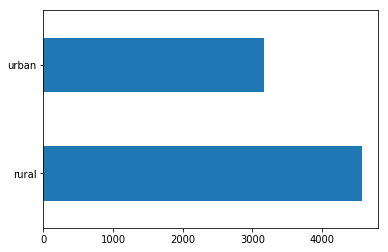

In [22]:
data['geographical location'].value_counts().plot.barh()

In [23]:
df['geographical location'].value_counts(), 





(rural    4579
 urban    3166
 Name: geographical location, dtype: int64,)

In [24]:
df['geographical location'].value_counts(normalize=True).mul(100) #VIEW IN PERCENTAGE

rural    59.122014
urban    40.877986
Name: geographical location, dtype: float64

In [54]:
df.groupby('wealth index')['state'].describe()  #view statistics of state based on wealth index

,count,unique,top,freq
wealth index,,,,
middle,1676,37,nasarawa,89
poorer,1351,35,taraba,97
poorest,1058,25,sokoto,108
richer,1844,37,ekiti,107
richest,1816,36,lagos,207


In [26]:
df.groupby('availability of electricity')['state','region'].describe() 

state                      region         \
                            count unique      top freq  count unique   
availability of electricity                                            
no                           3498     37  adamawa  189   3498      6   
yes                          4247     37    lagos  224   4247      6   

                                               
                                    top  freq  
availability of electricity                    
no                           north west  1049  
yes                          south west  1002

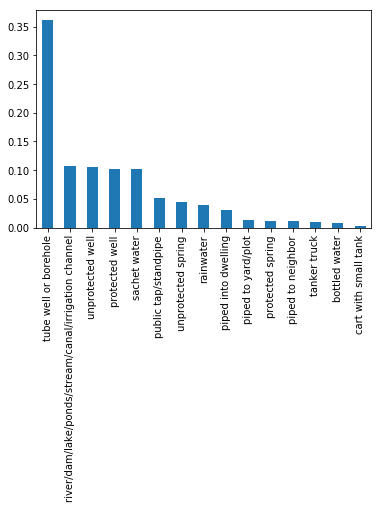

In [27]:
(data['source of water'].value_counts().head(15) / len(data)).plot.bar() #This bar chart tells us absolute numbers, but it's more useful to know relative proportions.

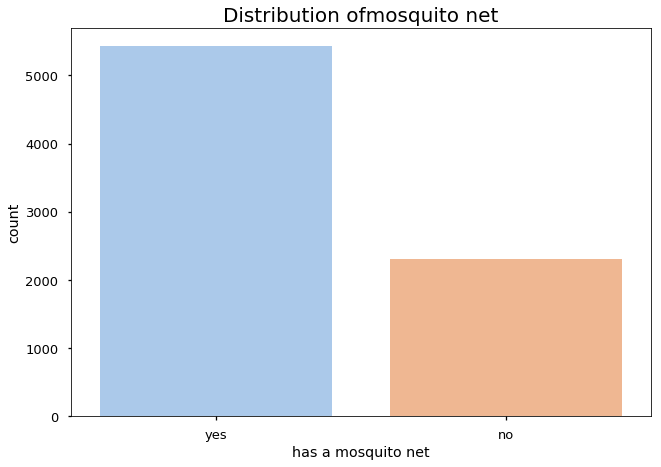

In [28]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data['has a mosquito net'], palette = 'pastel')
plt.title('Distribution ofmosquito net', fontsize = 20)
plt.show()

In [29]:
df.groupby('has a mosquito net')['state'].describe() 

,count,unique,top,freq
has a mosquito net,,,,
no,2313,37,edo,124
yes,5432,37,bauchi,221


In [30]:
malaria = pd.get_dummies(data, drop_first=True)

In [31]:
malaria.head()

,region_north east,region_north west,region_south east,region_south south,region_south west,geographical location_urban,source of water_cart with small tank,source of water_other,source of water_piped into dwelling,source of water_piped to neighbor,...,state_ogun,state_ondo,state_osun,state_oyo,state_plateau,state_rivers,state_sokoto,state_taraba,state_yobe,state_zamfara
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
 malaria.corr()


,region_north east,region_north west,region_south east,region_south south,region_south west,geographical location_urban,source of water_cart with small tank,source of water_other,source of water_piped into dwelling,source of water_piped to neighbor,...,state_ogun,state_ondo,state_osun,state_oyo,state_plateau,state_rivers,state_sokoto,state_taraba,state_yobe,state_zamfara
region_north east,1.000000,-0.213922,-0.165060,-0.190616,-0.194968,-0.120151,0.035214,-0.009733,0.043676,0.044734,...,-0.073214,-0.073726,-0.073385,-0.073896,-0.068995,-0.073214,-0.073896,0.403968,0.403968,-0.073214
region_north west,-0.213922,1.000000,-0.192587,-0.222404,-0.227482,-0.129007,-0.029549,-0.011357,0.124365,0.010045,...,-0.085424,-0.086021,-0.085623,-0.086220,-0.080501,-0.085424,0.345435,-0.086418,-0.086418,0.342246
region_south east,-0.165060,-0.192587,1.000000,-0.171605,-0.175523,0.118482,0.003309,-0.008763,-0.068638,-0.025508,...,-0.065912,-0.066373,-0.066066,-0.066526,-0.062114,-0.065912,-0.066526,-0.066679,-0.066679,-0.065912
region_south south,-0.190616,-0.222404,-0.171605,1.000000,-0.202699,-0.054181,-0.026330,0.035768,-0.049060,-0.023128,...,-0.076117,-0.076650,-0.076295,-0.076826,-0.071731,0.384091,-0.076826,-0.077003,-0.077003,-0.076117
region_south west,-0.194968,-0.227482,-0.175523,-0.202699,1.000000,0.255802,0.002111,0.004718,-0.047351,0.005207,...,0.375518,0.378145,0.376395,0.379017,-0.073369,-0.077855,-0.078580,-0.078761,-0.078761,-0.077855
geographical location_urban,-0.120151,-0.129007,0.118482,-0.054181,0.255802,1.000000,0.039939,0.004218,0.081737,0.047323,...,0.012756,0.010746,0.127238,0.091576,-0.057059,0.009594,-0.066710,-0.065641,-0.065641,-0.063130
source of water_cart with small tank,0.035214,-0.029549,0.003309,-0.026330,0.002111,0.039939,1.000000,-0.001345,-0.010531,-0.006193,...,-0.010113,-0.010184,-0.010137,0.042079,-0.009530,-0.010113,-0.010207,0.002812,-0.010231,-0.010113
source of water_other,-0.009733,-0.011357,-0.008763,0.035768,0.004718,0.004218,-0.001345,1.000000,-0.004047,-0.002380,...,-0.003887,-0.003914,-0.003896,-0.003923,-0.003663,-0.003887,-0.003923,-0.003932,-0.003932,-0.003887
source of water_piped into dwelling,0.043676,0.124365,-0.068638,-0.049060,-0.047351,0.081737,-0.010531,-0.004047,1.000000,-0.018645,...,-0.030445,-0.017236,-0.012542,-0.008408,-0.023927,-0.030445,-0.017336,-0.030799,-0.026345,-0.030445
source of water_piped to neighbor,0.044734,0.010045,-0.025508,-0.023128,0.005207,0.047323,-0.006193,-0.002380,-0.018645,1.000000,...,-0.010401,0.011789,0.004516,0.019121,-0.008935,-0.017904,-0.018071,-0.018113,-0.018113,-0.017904


In [33]:
regionb = malaria.filter(["region_north east","region_north west","region_south east","region_south south","region_south west"], axis=1)
print(regionb)
regionb=pd.DataFrame(regionb)

      region_north east  region_north west  region_south east  \
0                     0                  1                  0   
1                     0                  1                  0   
2                     0                  1                  0   
3                     0                  1                  0   
4                     0                  1                  0   
5                     0                  1                  0   
6                     0                  1                  0   
7                     0                  1                  0   
8                     0                  1                  0   
9                     0                  1                  0   
10                    0                  1                  0   
11                    0                  1                  0   
12                    0                  1                  0   
13                    0                  1                  0   
14                    0  

In [34]:
watersource= malaria.filter(["source of water_cart with small tank","source of water_other","source of water_piped into dwelling","source of water_piped to neighbor","source of water_piped to yard/plot","source of water_protected spring","source of water_protected well","source of water_public tap/standpipe","source of water_rainwater","source of water_river/dam/lake/ponds/stream/can...","source of water_sachet water", "source of water_tanker truck","source of water_tube well or borehole", "source of water_unprotected spring","source of water_unprotected",], axis=1)
print(watersource)
watersource=pd.DataFrame(watersource)

      source of water_cart with small tank  source of water_other  \
0                                        0                      0   
1                                        0                      0   
2                                        0                      0   
3                                        0                      0   
4                                        0                      0   
5                                        0                      0   
6                                        0                      0   
7                                        0                      0   
8                                        0                      0   
9                                        0                      0   
10                                       0                      0   
11                                       0                      0   
12                                       0                      0   
13                                

In [35]:
toilet=malaria.filter(['toilet facility_composting toilet',
                       'toilet facility_flush to piped sewer system', 
                       'toilet facility_flush to pit latrine',                         
'toilet facility_flush to septic tank',                        
'toilet facility_flush to somewhere else',                    
'toilet facility_flush, don\'t know where',                       
'toilet facility_hanging toilet/latrine',                      
'toilet facility_no facility/bush/field',                       
'toilet facility_other'], axis=1)
print(toilet)
toilet=pd.DataFrame(toilet)

      toilet facility_composting toilet  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
5                                     0   
6                                     0   
7                                     0   
8                                     0   
9                                     0   
10                                    0   
11                                    0   
12                                    0   
13                                    0   
14                                    0   
15                                    0   
16                                    0   
17                                    0   
18                                    0   
19                                    0   
20                                    0   
21                                    0   
22         

In [37]:
regions=regionb.sample(2000)
waters=watersource.sample(2000)
toilets=toilet.sample(2000)

In [38]:
regions.reset_index(drop=True, inplace=True)
waters.reset_index(drop=True, inplace=True)
toilets.reset_index(drop=True, inplace=True)

In [37]:
new = pd.concat([regions, waters,toilets], axis=1)
new

,region_north east,region_north west,region_south east,region_south south,region_south west,source of water_cart with small tank,source of water_other,source of water_piped into dwelling,source of water_piped to neighbor,source of water_piped to yard/plot,...,source of water_unprotected spring,toilet facility_composting toilet,toilet facility_flush to piped sewer system,toilet facility_flush to pit latrine,toilet facility_flush to septic tank,toilet facility_flush to somewhere else,"toilet facility_flush, don't know where",toilet facility_hanging toilet/latrine,toilet facility_no facility/bush/field,toilet facility_other
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


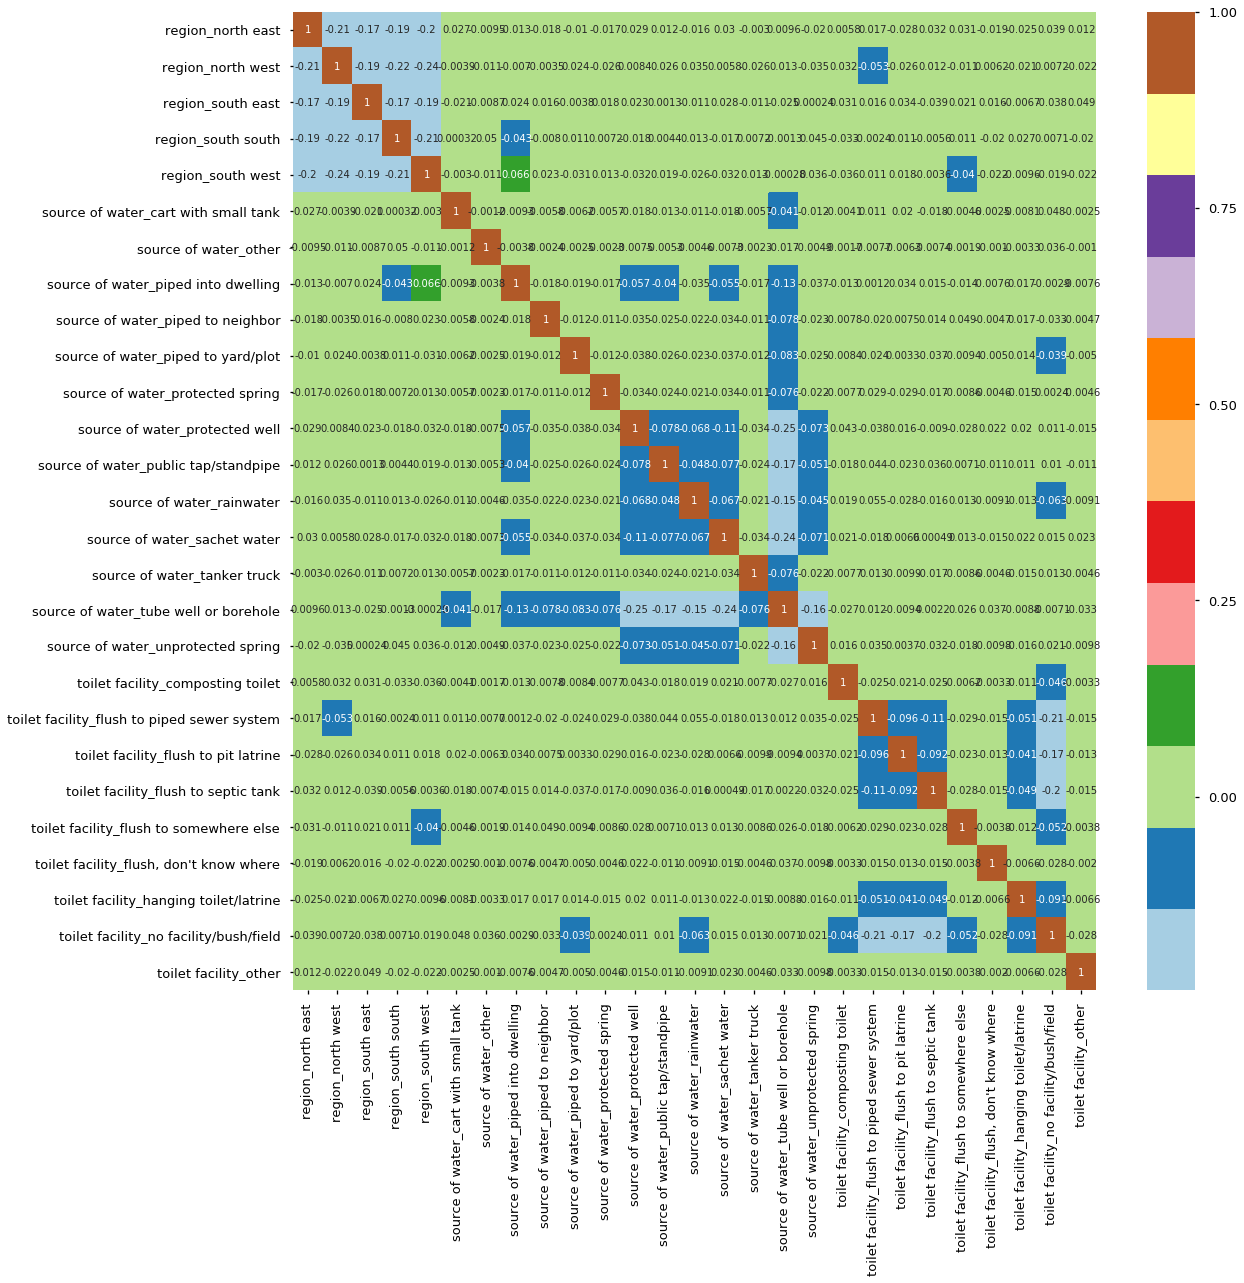

In [190]:
corrmat = new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(new[top_corr_features].corr(),annot=True,cmap="Paired")

In [39]:
data['state'].unique()

array(['sokoto', 'zamfara', 'katsina', 'jigawa', 'yobe', 'borno - urban',
       'adamawa', 'gombe', 'bauchi', 'kano', 'kaduna', 'kebbi', 'niger',
       'fct abuja', 'nasarawa', 'plateau', 'taraba', 'benue', 'kogi',
       'kwara', 'oyo', 'osun', 'ekiti', 'ondo', 'edo', 'anambra', 'enugu',
       'ebonyi', 'cross river', 'akwa ibom', 'abia', 'imo', 'rivers',
       'bayelsa', 'delta', 'lagos', 'ogun'], dtype=object)

In [40]:
data['state'].describe()

count       7745
unique        37
top       jigawa
freq         225
Name: state, dtype: object

Text(0.5, 1.0, 'geographical location - wealth index')

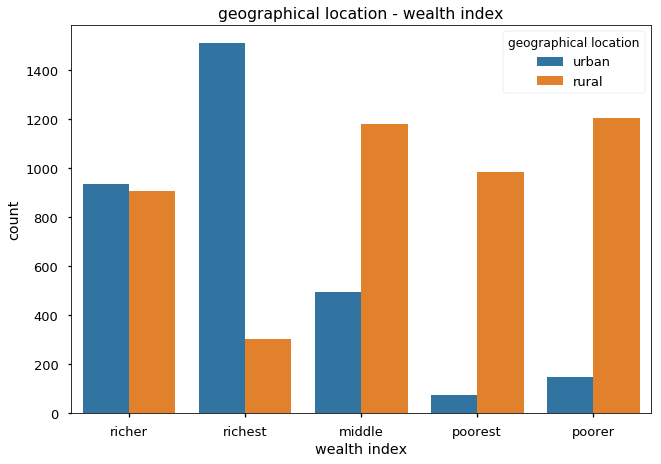

In [41]:
sns.countplot(x="wealth index", data=data,hue = 'geographical location').set_title("geographical location - wealth index")


Text(0.5, 1.0, 'REGION- MOSQUITO NET')

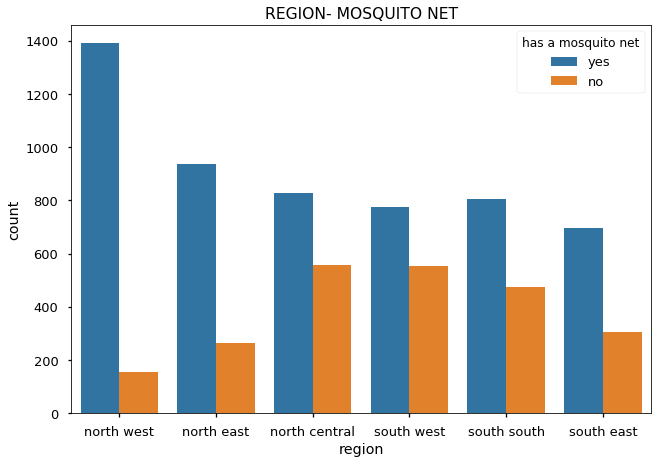

In [191]:
sns.countplot(x="region", data=data,hue = 'has a mosquito net').set_title("REGION- MOSQUITO NET")


no     87.540349
yes    12.459651
Name: has a carortruck, dtype: float64


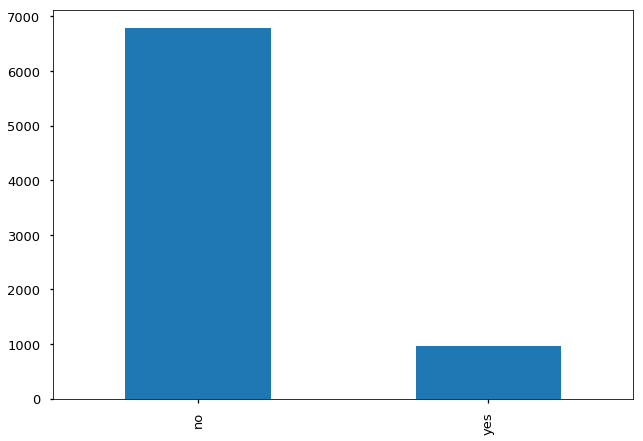

In [43]:
data['has a carortruck'].value_counts().plot.bar()

q=data['has a carortruck'].value_counts(normalize=True).mul(100) 
print(q)

no     81.962556
yes    18.037444
Name: owns a bicycle, dtype: float64


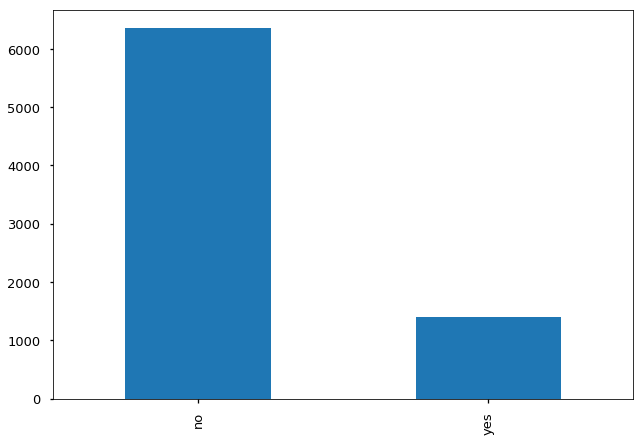

In [44]:
data['owns a bicycle'].value_counts().plot.bar()



p=data['owns a bicycle'].value_counts(normalize=True).mul(100) 
print(p)

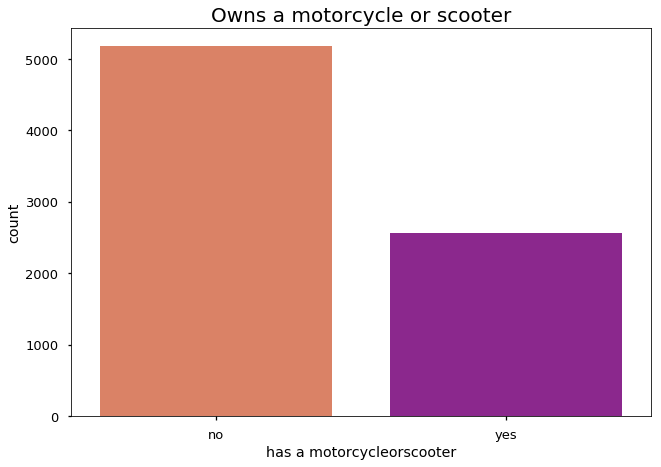

In [45]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data['has a motorcycleorscooter'], palette = 'plasma_r')
plt.title('Owns a motorcycle or scooter', fontsize = 20)
plt.show()

In [56]:
df['has a motorcycleorscooter'].value_counts(normalize=True).mul(100)

no     66.881859
yes    33.118141
Name: has a motorcycleorscooter, dtype: float64

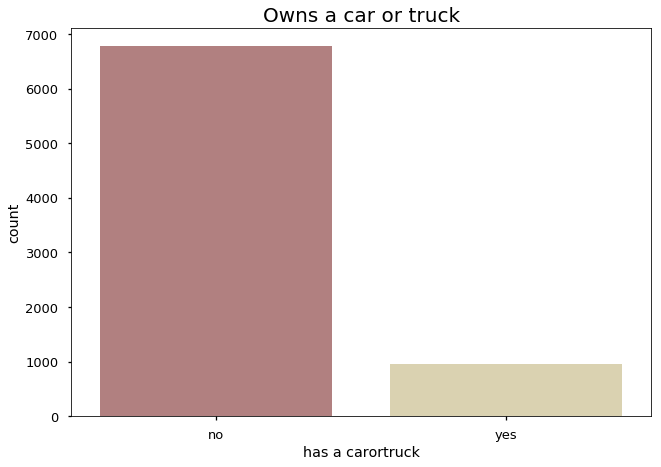

In [46]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data['has a carortruck'], palette = 'pink')
plt.title('Owns a car or truck', fontsize = 20)
plt.show()

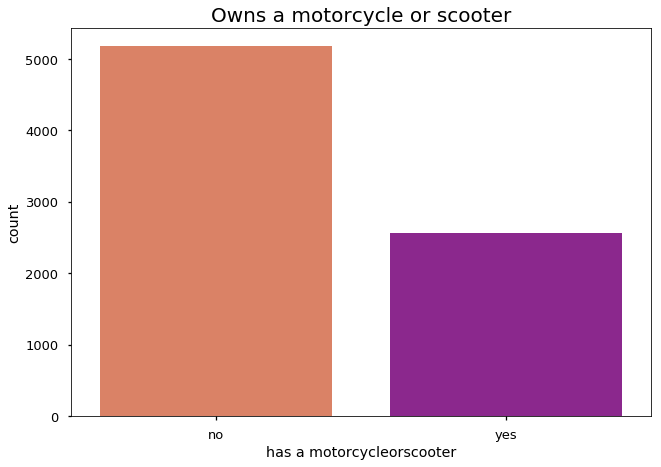

In [47]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data['has a motorcycleorscooter'], palette = 'plasma_r')
plt.title('Owns a motorcycle or scooter', fontsize = 20)
plt.show()

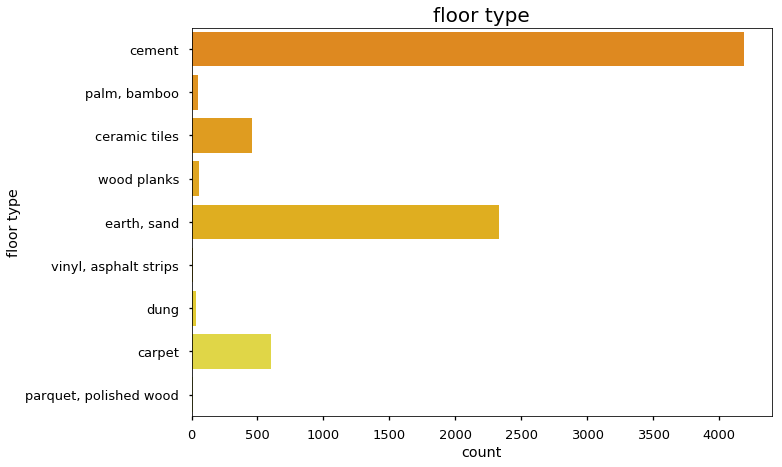

In [60]:

plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('seaborn-talk')
sns.countplot(y=data['floor type'], palette = 'Wistia_r')
plt.title('floor type', fontsize = 20)
plt.show()

In [62]:
df['floor type'].value_counts(normalize=True).mul(100)

cement                    54.112331
earth, sand               30.135571
carpet                     7.759845
ceramic tiles              5.900581
wood planks                0.748870
palm, bamboo               0.645578
dung                       0.464816
parquet, polished wood     0.129116
vinyl, asphalt strips      0.103292
Name: floor type, dtype: float64

zinc/metal               5669
thatch/palm leaf          981
palm/bamboo               222
wood planks               149
wood                      147
cement                    141
roofing shingles          113
cardboard                  77
sod                        56
rustic mat                 46
no roof                    43
calamine/cement fiber      41
ceramic tiles              32
other                      28
Name: roofing material, dtype: int64


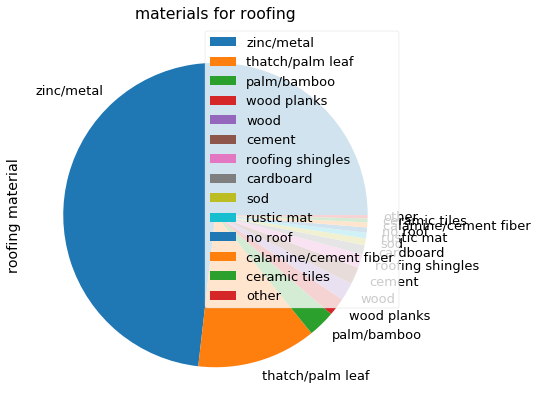

In [49]:

roofing = df['roofing material'].value_counts()
print(roofing)

# Plot a pie chart

roofing.plot(kind='pie', title='materials for roofing', figsize=(15,7)) 

plt.legend()
plt.show()

zinc/metal               5669
thatch/palm leaf          981
palm/bamboo               222
wood planks               149
wood                      147
cement                    141
roofing shingles          113
cardboard                  77
sod                        56
rustic mat                 46
no roof                    43
calamine/cement fiber      41
ceramic tiles              32
other                      28
Name: roofing material, dtype: int64


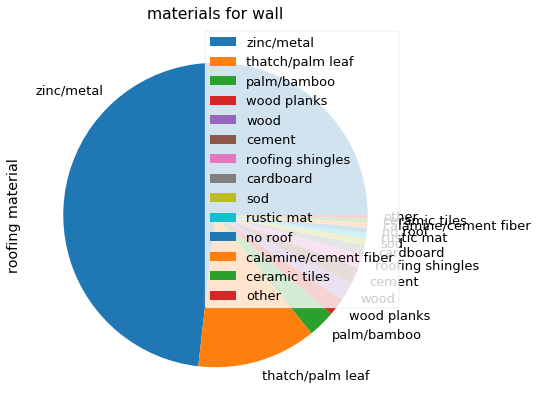

In [50]:
# Create a data frame of adjudicated_gradable counts 
wall = df['wall material'].value_counts()
print(roofing)

# Plot a pie chart

roofing.plot(kind='pie', title='materials for wall', figsize=(15,7)) 

plt.legend()
plt.show()

tube well or borehole                                   2795
river/dam/lake/ponds/stream/canal/irrigation channel     829
unprotected well                                         819
protected well                                           786
sachet water                                             786
public tap/standpipe                                     393
unprotected spring                                       349
rainwater                                                308
piped into dwelling                                      238
piped to yard/plot                                       101
protected spring                                          87
piped to neighbor                                         84
tanker truck                                              71
bottled water                                             68
cart with small tank                                      27
other                                                      4
Name: source of water, d

Text(0.5, 1.0, 'source of water - electricity')

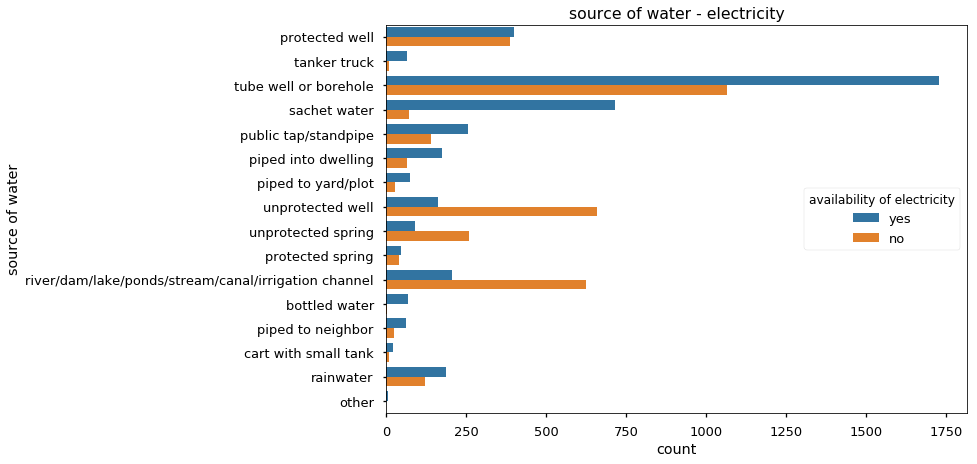

In [51]:
watersource = df['source of water'].value_counts()
print(watersource)

electricity = df['availability of electricity'].value_counts()
print(electricity)

sns.countplot(y="source of water", data=data,hue = 'availability of electricity').set_title("source of water - electricity")

In [168]:
df['region'].value_counts().nlargest(1)



north west    1547
Name: region, dtype: int64

In [169]:
df['state'].value_counts().nlargest(1)



jigawa    225
Name: state, dtype: int64

In [170]:
df['wall material'].value_counts().nlargest(1)


cement    4724
Name: wall material, dtype: int64

In [171]:
df['roofing material'].value_counts().nlargest(1)


zinc/metal    5669
Name: roofing material, dtype: int64

In [172]:
df['source of water'].value_counts().nlargest(1)


tube well or borehole    2795
Name: source of water, dtype: int64

In [173]:

df['toilet facility'].value_counts().nlargest(1)


no facility/bush/field    2160
Name: toilet facility, dtype: int64

In [174]:
df['floor type'].value_counts().nlargest(1)


cement    4191
Name: floor type, dtype: int64

In [175]:
df['geographical location'].value_counts().nlargest(1)


rural    4579
Name: geographical location, dtype: int64

In [176]:
df['owns a bicycle'].value_counts().nlargest(1)


no    6348
Name: owns a bicycle, dtype: int64

In [177]:
df['owns land for farming'].value_counts().nlargest(1)


yes    4701
Name: owns land for farming, dtype: int64

In [178]:
df['has a bank account'].value_counts().nlargest(1)


no    4477
Name: has a bank account, dtype: int64

In [179]:
df['wealth index'].value_counts().nlargest(1)


richer    1844
Name: wealth index, dtype: int64

In [180]:
df['has a mosquito net'].value_counts().nlargest(1)


yes    5432
Name: has a mosquito net, dtype: int64

In [181]:
df['has a carortruck'].value_counts().nlargest(1)


no    6780
Name: has a carortruck, dtype: int64

In [182]:
df['has a motorcycleorscooter'].value_counts().nlargest(1)



no    5180
Name: has a motorcycleorscooter, dtype: int64

In [78]:
for i in df.columns:
    x = df[i].value_counts().nlargest(1)
    y=df[i].value_counts(normalize=True)*100
    print("Column name is:",i,"and its highest is:",x, "and percentage is:",y)
    print()

Column name is: region and its highest is: north west    1547
Name: region, dtype: int64 and percentage is: north west       19.974177
north central    17.882505
south west       17.172369
south south      16.539703
north east       15.493867
south east       12.937379
Name: region, dtype: float64

Column name is: geographical location and its highest is: rural    4579
Name: geographical location, dtype: int64 and percentage is: rural    59.122014
urban    40.877986
Name: geographical location, dtype: float64

Column name is: source of water and its highest is: tube well or borehole    2795
Name: source of water, dtype: int64 and percentage is: tube well or borehole                                   36.087799
river/dam/lake/ponds/stream/canal/irrigation channel    10.703680
unprotected well                                        10.574564
protected well                                          10.148483
sachet water                                            10.148483
public tap/standp

tube well or borehole                                   2795
river/dam/lake/ponds/stream/canal/irrigation channel     829
unprotected well                                         819
protected well                                           786
sachet water                                             786
public tap/standpipe                                     393
unprotected spring                                       349
rainwater                                                308
piped into dwelling                                      238
piped to yard/plot                                       101
protected spring                                          87
piped to neighbor                                         84
tanker truck                                              71
bottled water                                             68
cart with small tank                                      27
other                                                      4
Name: source of water, d

Text(0.5, 1.0, 'source of water - electricity')

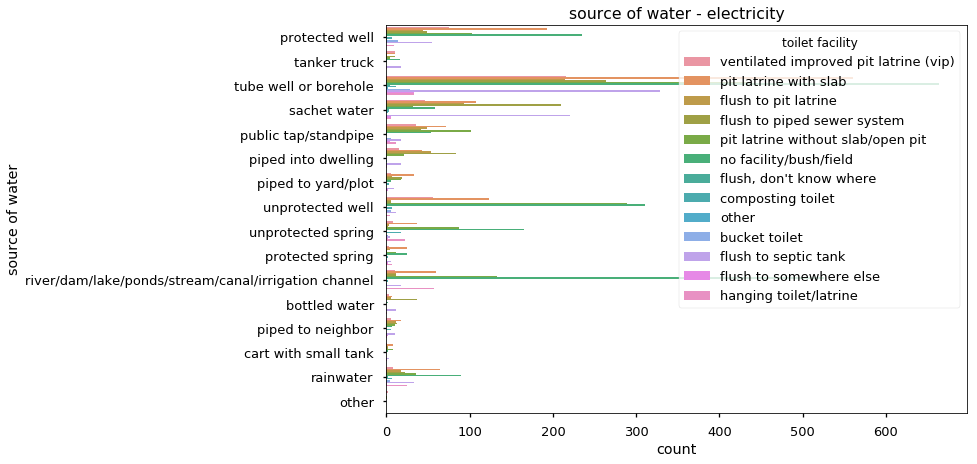

In [76]:
watersource = df['source of water'].value_counts()
print(watersource)

toilettype= df['toilet facility'].value_counts()
print(toilettype)


sns.countplot(y="source of water", data=data,hue = 'toilet facility').set_title("source of water - electricity")

In [77]:
df.groupby(["region","geographical location","source of water","toilet facility","availability of electricity","floor type","wall material","roofing material","owns a bicycle","has a motorcycleorscooter","has a carortruck","has a mosquito net","owns land for farming","has a bank account","wealth index","state"]).count().sort_values(by='region').groupby(level=0).tail(1)




,,,,,,,,,,,,,,,
region,geographical location,source of water,toilet facility,availability of electricity,floor type,wall material,roofing material,owns a bicycle,has a motorcycleorscooter,has a carortruck,has a mosquito net,owns land for farming,has a bank account,wealth index,state
north central,rural,sachet water,flush to septic tank,no,carpet,cement,zinc/metal,no,yes,no,yes,yes,yes,richer,kogi
north east,rural,tube well or borehole,no facility/bush/field,no,"earth, sand",stone with mud,zinc/metal,no,no,no,yes,yes,yes,poorest,yobe
north west,rural,tube well or borehole,pit latrine without slab/open pit,no,"earth, sand",bamboo with mud,zinc/metal,no,yes,no,yes,yes,no,poorest,katsina
south east,rural,tube well or borehole,pit latrine with slab,no,cement,cement blocks,zinc/metal,no,yes,no,no,no,no,middle,imo
south south,rural,river/dam/lake/ponds/stream/canal/irrigation channel,pit latrine with slab,yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,edo
south west,urban,unprotected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,yes,yes,middle,ekiti


In [79]:
crosstab = pd.crosstab(df["owns land for farming"], df["owns a bicycle"])

crosstab

owns a bicycle,no,yes
owns land for farming,,
no,2752,292
yes,3596,1105
